In [1]:
# import libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# reading data with pandas
data = pd.read_csv('delaware_anomaly.csv')

In [3]:
# checking head of data
data.head()

,FISCAL_YEAR,FISCAL_PERIOD,DEPT_NAME,DIV_NAME,MERCHANT,CAT_DESCR,TRANS_DT,MERCHANDISE_AMT
0,2015,1,DEPT OF EDUCATION,DEPARTMENT OF EDUCATION,DOUBLETREE HOTELS WASHING,LODGING,6/3/2014,-5.50
1,2015,1,DEPT OF EDUCATION,DEPARTMENT OF EDUCATION,HYATT REGENCY NW ORLE F/B,EATING PLACES RESTAURANTS,6/26/2014,18.31
2,2015,1,DEPT OF EDUCATION,DEPARTMENT OF EDUCATION,HYATT REGENCY NW ORLE F/B,EATING PLACES RESTAURANTS,6/26/2014,21.61
3,2015,1,DEPT OF EDUCATION,DEPARTMENT OF EDUCATION,HYATT REGENCY NW ORLE F/B,EATING PLACES RESTAURANTS,6/26/2014,22.39
4,2015,1,DEPT OF EDUCATION,DEPARTMENT OF EDUCATION,HYATT REGENCY NW ORLE F/B,EATING PLACES RESTAURANTS,6/26/2014,5.44


In [4]:
# check shape of data
data.shape

(15156, 8)

In [10]:
# check dtypes
# notice that TRANS_DT is treated as object i.e. string
data.dtypes

FISCAL_YEAR          int64
FISCAL_PERIOD        int64
DEPT_NAME           object
DIV_NAME            object
MERCHANT            object
CAT_DESCR           object
TRANS_DT            object
MERCHANDISE_AMT    float64
dtype: object

In [12]:
# change TRANS_DT to date format
data['TRANS_DT'] = pd.to_datetime(data['TRANS_DT'])
data.dtypes

FISCAL_YEAR                 int64
FISCAL_PERIOD               int64
DEPT_NAME                  object
DIV_NAME                   object
MERCHANT                   object
CAT_DESCR                  object
TRANS_DT           datetime64[ns]
MERCHANDISE_AMT           float64
dtype: object

In [22]:
# check the cardinality for all categorical features
for i in data.select_dtypes('object').columns:
    print(f'{i}: {data[i].nunique()}')

DEPT_NAME: 1
DIV_NAME: 25
MERCHANT: 5802
CAT_DESCR: 208


# Data Preparation

In [23]:
from pycaret.anomaly import *
s = setup(data, session_id = 123,
          normalize = True, normalize_method = 'minmax', 
          high_cardinality_features = ['MERCHANT', 'CAT_DESCR'])

,Description,Value
0,session_id,123
1,Original Data,"(15156, 8)"
2,Missing Values,False
3,Numeric Features,1
4,Categorical Features,6
5,Ordinal Features,False
6,High Cardinality Features,True
7,High Cardinality Method,frequency
8,Transformed Data,"(15156, 70)"
9,CPU Jobs,-1


In [26]:
# check dataset after transformation
get_config('X').head()

,MERCHANT,CAT_DESCR,MERCHANDISE_AMT,FISCAL_YEAR_2015,FISCAL_YEAR_2016,FISCAL_YEAR_2017,FISCAL_YEAR_2018,FISCAL_YEAR_2019,FISCAL_YEAR_2020,FISCAL_PERIOD_1,...,TRANS_DT_weekday_1,TRANS_DT_weekday_2,TRANS_DT_weekday_3,TRANS_DT_weekday_4,TRANS_DT_weekday_5,TRANS_DT_weekday_6,TRANS_DT_is_month_end_0,TRANS_DT_is_month_end_1,TRANS_DT_is_month_start_0,TRANS_DT_is_month_start_1
0,0.000000,0.377835,0.126726,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.010274,0.638367,0.126961,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.010274,0.638367,0.126994,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.010274,0.638367,0.127002,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.010274,0.638367,0.126834,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


# Model Training

In [27]:
# check available models
models()

,Name,Reference
ID,,
abod,Angle-base Outlier Detection,pyod.models.abod.ABOD
cluster,Clustering-Based Local Outlier,pyod.models.cblof.CBLOF
cof,Connectivity-Based Local Outlier,pyod.models.cof.COF
iforest,Isolation Forest,pyod.models.iforest.IForest
histogram,Histogram-based Outlier Detection,pyod.models.hbos.HBOS
knn,K-Nearest Neighbors Detector,pyod.models.knn.KNN
lof,Local Outlier Factor,pyod.models.lof.LOF
svm,One-class SVM detector,pyod.models.ocsvm.OCSVM
pca,Principal Component Analysis,pyod.models.pca.PCA


In [28]:
iforest = create_model('iforest')

# Assign Anomaly Label

In [30]:
iforest_results = assign_model(iforest)
iforest_results.head()

,FISCAL_YEAR,FISCAL_PERIOD,DEPT_NAME,DIV_NAME,MERCHANT,CAT_DESCR,TRANS_DT,MERCHANDISE_AMT,Anomaly,Anomaly_Score
0,2015,1,DEPT OF EDUCATION,DEPARTMENT OF EDUCATION,DOUBLETREE HOTELS WASHING,LODGING,2014-06-03,-5.50,0,-0.060031
1,2015,1,DEPT OF EDUCATION,DEPARTMENT OF EDUCATION,HYATT REGENCY NW ORLE F/B,EATING PLACES RESTAURANTS,2014-06-26,18.31,0,-0.060889
2,2015,1,DEPT OF EDUCATION,DEPARTMENT OF EDUCATION,HYATT REGENCY NW ORLE F/B,EATING PLACES RESTAURANTS,2014-06-26,21.61,0,-0.060889
3,2015,1,DEPT OF EDUCATION,DEPARTMENT OF EDUCATION,HYATT REGENCY NW ORLE F/B,EATING PLACES RESTAURANTS,2014-06-26,22.39,0,-0.060889
4,2015,1,DEPT OF EDUCATION,DEPARTMENT OF EDUCATION,HYATT REGENCY NW ORLE F/B,EATING PLACES RESTAURANTS,2014-06-26,5.44,0,-0.060889


In [31]:
iforest_results['Anomaly'].value_counts()

0    14398
1      758
Name: Anomaly, dtype: int64

# Examine Anomalies

In [34]:
iforest_results[iforest_results['Anomaly'] == 1]

,FISCAL_YEAR,FISCAL_PERIOD,DEPT_NAME,DIV_NAME,MERCHANT,CAT_DESCR,TRANS_DT,MERCHANDISE_AMT,Anomaly,Anomaly_Score
67,2015,1,DEPT OF EDUCATION,SPECIAL NEEDS PROGRAMS,CEA,ORGANIZATIONS MEMBERSHIP-NOT ELSEWHERE CLASSIFIED,2014-06-30,325.00,1,0.001838
73,2015,1,DEPT OF EDUCATION,DEPARTMENT OF EDUCATION,MARRIOTT 33787 COPLEY F AND B,LODGING,2014-06-30,6.90,1,0.000250
74,2015,1,DEPT OF EDUCATION,DEPARTMENT OF EDUCATION,MARRIOTT 33790 ATL MRQ FB,LODGING,2014-06-30,6.48,1,0.000250
79,2015,1,DEPT OF EDUCATION,DEPARTMENT OF EDUCATION,WESTIN SWAN,LODGING,2014-06-30,1006.90,1,0.002267
80,2015,1,DEPT OF EDUCATION,DEPARTMENT OF EDUCATION,WESTIN SWAN,LODGING,2014-06-30,7.99,1,0.000250
...,...,...,...,...,...,...,...,...,...,...
15086,2020,5,DEPT OF EDUCATION,Special Needs Programs,RESTAURANT DEPOT,Grocery Stores Supermarkets,2019-11-01,132.24,1,0.041524
15120,2020,6,DEPT OF EDUCATION,Office of the Secretary,BIRCH And BARLEY/CHURCHKEY,Eating Places Restaurants,2019-12-01,38.28,1,0.038202
15121,2020,6,DEPT OF EDUCATION,Academic Support,UPS*000021X956,Courier Svc-Air Ground Freight Forwarders,2019-12-15,10.18,1,0.004807
15122,2020,6,DEPT OF EDUCATION,Academic Support,32752 - BWI LONG TERM A,Automobile Parking Lots And Garages,2019-12-08,40.00,1,0.003924


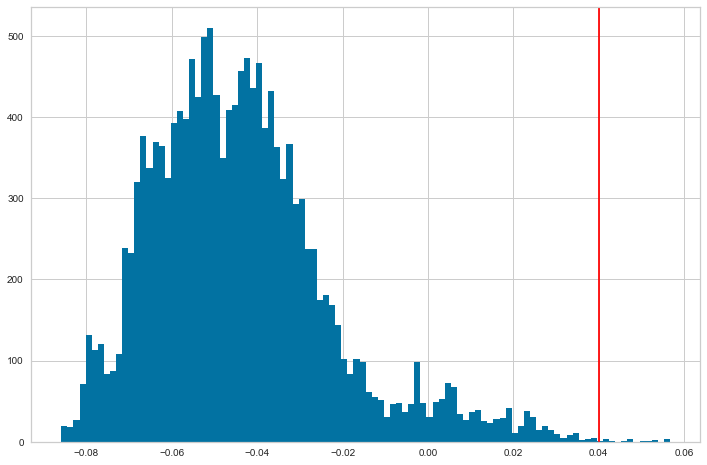

In [47]:
# Anomaly_Score is a distribution so you can do something like this as well
# to come up with your threshold manually

iforest_results['Anomaly_Score'].hist(bins=100, figsize=(12,8))
plt.axvline(x=0.04, color = 'red')

# 👉 Assign New Observations 
## Equivalent to Predict in Supervised Learning

In [48]:
new_data = data.copy()
new_data.head()

,FISCAL_YEAR,FISCAL_PERIOD,DEPT_NAME,DIV_NAME,MERCHANT,CAT_DESCR,TRANS_DT,MERCHANDISE_AMT
0,2015,1,DEPT OF EDUCATION,DEPARTMENT OF EDUCATION,DOUBLETREE HOTELS WASHING,LODGING,2014-06-03,-5.50
1,2015,1,DEPT OF EDUCATION,DEPARTMENT OF EDUCATION,HYATT REGENCY NW ORLE F/B,EATING PLACES RESTAURANTS,2014-06-26,18.31
2,2015,1,DEPT OF EDUCATION,DEPARTMENT OF EDUCATION,HYATT REGENCY NW ORLE F/B,EATING PLACES RESTAURANTS,2014-06-26,21.61
3,2015,1,DEPT OF EDUCATION,DEPARTMENT OF EDUCATION,HYATT REGENCY NW ORLE F/B,EATING PLACES RESTAURANTS,2014-06-26,22.39
4,2015,1,DEPT OF EDUCATION,DEPARTMENT OF EDUCATION,HYATT REGENCY NW ORLE F/B,EATING PLACES RESTAURANTS,2014-06-26,5.44


In [49]:
# since we are using the same data the labels from predict_model
# will match with what we have obtained above using assign_model
# see below

predictions = predict_model(iforest, data=new_data)
predictions.head(10)

,FISCAL_YEAR,FISCAL_PERIOD,DEPT_NAME,DIV_NAME,MERCHANT,CAT_DESCR,TRANS_DT,MERCHANDISE_AMT,Anomaly,Anomaly_Score
0,2015,1,DEPT OF EDUCATION,DEPARTMENT OF EDUCATION,DOUBLETREE HOTELS WASHING,LODGING,2014-06-03,-5.50,0,-0.060031
1,2015,1,DEPT OF EDUCATION,DEPARTMENT OF EDUCATION,HYATT REGENCY NW ORLE F/B,EATING PLACES RESTAURANTS,2014-06-26,18.31,0,-0.060889
2,2015,1,DEPT OF EDUCATION,DEPARTMENT OF EDUCATION,HYATT REGENCY NW ORLE F/B,EATING PLACES RESTAURANTS,2014-06-26,21.61,0,-0.060889
3,2015,1,DEPT OF EDUCATION,DEPARTMENT OF EDUCATION,HYATT REGENCY NW ORLE F/B,EATING PLACES RESTAURANTS,2014-06-26,22.39,0,-0.060889
4,2015,1,DEPT OF EDUCATION,DEPARTMENT OF EDUCATION,HYATT REGENCY NW ORLE F/B,EATING PLACES RESTAURANTS,2014-06-26,5.44,0,-0.060889
5,2015,1,DEPT OF EDUCATION,DEPARTMENT OF EDUCATION,SHERATON DOLPHIN DINING,EATING PLACES RESTAURANTS,2014-06-26,17.17,0,-0.059998
6,2015,1,DEPT OF EDUCATION,DEPARTMENT OF EDUCATION,TAPAS ON MAIN,EATING PLACES RESTAURANTS,2014-06-26,32.67,0,-0.060889
7,2015,1,DEPT OF EDUCATION,DEPARTMENT OF EDUCATION,TAPAS ON MAIN,EATING PLACES RESTAURANTS,2014-06-26,32.89,0,-0.060889
8,2015,1,DEPT OF EDUCATION,DEPARTMENT OF EDUCATION,USAIRWAYS 0372363267867,AIRLINE,2014-06-26,25.00,0,-0.063984
9,2015,1,DEPT OF EDUCATION,EDUCATION BLOCK GRANTS,MTC INC,EATING PLACES RESTAURANTS,2014-06-27,12.33,0,-0.034672


In [51]:
# results from assign_model
# this matches with the results from predict_model
# since we are using the same data

iforest_results.head(10)

,FISCAL_YEAR,FISCAL_PERIOD,DEPT_NAME,DIV_NAME,MERCHANT,CAT_DESCR,TRANS_DT,MERCHANDISE_AMT,Anomaly,Anomaly_Score
0,2015,1,DEPT OF EDUCATION,DEPARTMENT OF EDUCATION,DOUBLETREE HOTELS WASHING,LODGING,2014-06-03,-5.50,0,-0.060031
1,2015,1,DEPT OF EDUCATION,DEPARTMENT OF EDUCATION,HYATT REGENCY NW ORLE F/B,EATING PLACES RESTAURANTS,2014-06-26,18.31,0,-0.060889
2,2015,1,DEPT OF EDUCATION,DEPARTMENT OF EDUCATION,HYATT REGENCY NW ORLE F/B,EATING PLACES RESTAURANTS,2014-06-26,21.61,0,-0.060889
3,2015,1,DEPT OF EDUCATION,DEPARTMENT OF EDUCATION,HYATT REGENCY NW ORLE F/B,EATING PLACES RESTAURANTS,2014-06-26,22.39,0,-0.060889
4,2015,1,DEPT OF EDUCATION,DEPARTMENT OF EDUCATION,HYATT REGENCY NW ORLE F/B,EATING PLACES RESTAURANTS,2014-06-26,5.44,0,-0.060889
5,2015,1,DEPT OF EDUCATION,DEPARTMENT OF EDUCATION,SHERATON DOLPHIN DINING,EATING PLACES RESTAURANTS,2014-06-26,17.17,0,-0.059998
6,2015,1,DEPT OF EDUCATION,DEPARTMENT OF EDUCATION,TAPAS ON MAIN,EATING PLACES RESTAURANTS,2014-06-26,32.67,0,-0.060889
7,2015,1,DEPT OF EDUCATION,DEPARTMENT OF EDUCATION,TAPAS ON MAIN,EATING PLACES RESTAURANTS,2014-06-26,32.89,0,-0.060889
8,2015,1,DEPT OF EDUCATION,DEPARTMENT OF EDUCATION,USAIRWAYS 0372363267867,AIRLINE,2014-06-26,25.00,0,-0.063984
9,2015,1,DEPT OF EDUCATION,EDUCATION BLOCK GRANTS,MTC INC,EATING PLACES RESTAURANTS,2014-06-27,12.33,0,-0.034672


# 👉 Save / Load Pipeline with PyCaret

In [53]:
save_model(iforest, 'pycaret_iforest_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[],
                                       target='UNSUPERVISED_DUMMY_TARGET',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='most frequent',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None...
                 ('fix_perfect', 'passthrough'),
                 ('clean_names', Clean_Colum_Names()),
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                 ('dfs', 'passthrough'), ('pca', 'passthrough'),
                 ['trained_model',
                  IFo

In [54]:
loaded_pycaret_pipeline = load_model('pycaret_iforest_pipeline')
print(loaded_pycaret_pipeline)

Transformation Pipeline and Model Successfully Loaded
Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[],
                                      target='UNSUPERVISED_DUMMY_TARGET',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='most frequent',
                                fill_value_categorical=None,
                                fill_value_numerical=None...
                ('fix_perfect', 'passthrough'),
                ('clean_names', Clean_Colum_Names()),
                ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                ('dfs', 'passthrough'), ('pca', 'passthrough'),
                ['

In [55]:
# display as image
from sklearn import set_config
set_config(display = 'diagram')

In [56]:
loaded_pycaret_pipeline

Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[],
                                      target='UNSUPERVISED_DUMMY_TARGET',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='most frequent',
                                fill_value_categorical=None,
                                fill_value_numerical=None...
                ('fix_perfect', 'passthrough'),
                ('clean_names', Clean_Colum_Names()),
                ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                ('dfs', 'passthrough'), ('pca', 'passthrough'),
                ['trained_model',
                 IForest(behaviour='new', bootstrap=False, contamination=0.05,
    max_features=1.0, max_samples='auto', n_estimators=100, n_jobs=-1,
    random_state=123, verbose=0)]],
         verbose=False)